<a href="https://colab.research.google.com/github/vineethjay/Data-Analysis-Projects/blob/main/Vendorperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/vendor_performance_data.csv')

df

,PO_ID,Vendor_ID,Order_Date,Delivery_Date,Expected_Delivery_Date,Quality_Score,Cost_Overrun,Compliance
0,1001,V-001,2024-04-30,2024-05-14,2024-05-06,10,0,No
1,1002,V-001,2024-05-26,2024-06-25,2024-06-15,10,0,No
2,1003,V-001,2024-04-25,2024-05-18,2024-05-08,6,636,No
3,1004,V-003,2024-10-09,2024-10-25,2024-10-21,6,368,No
4,1005,V-004,2024-09-19,2024-10-11,2024-10-03,5,0,No
...,...,...,...,...,...,...,...,...
495,1496,V-001,2024-03-12,2024-04-04,2024-03-27,4,0,No
496,1497,V-004,2024-10-18,2024-10-31,2024-10-26,10,0,No
497,1498,V-001,2024-02-10,2024-02-28,2024-02-28,7,385,No
498,1499,V-003,2024-10-25,2024-11-03,2024-11-02,10,122,No


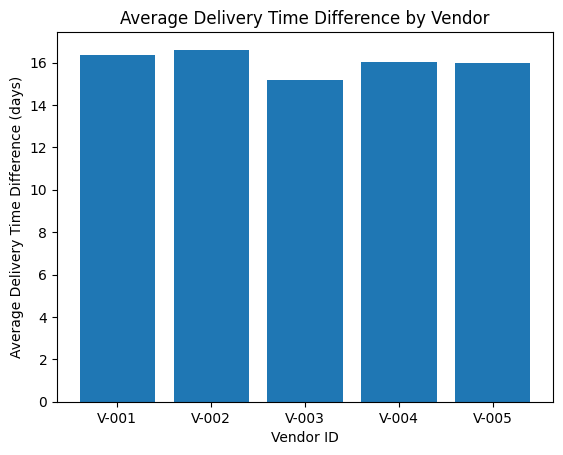

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

# Convert date columns to datetime objects for proper date calculations
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])
df['Expected_Delivery_Date'] = pd.to_datetime(df['Expected_Delivery_Date'])

# Calculate the delivery time difference
df['Delivery_Time_Difference'] = (df['Delivery_Date'] - df['Order_Date']).dt.days
df['Delivery_Time_Difference']

# Group by vendor and calculate the average delivery time difference
average_delivery_time = df.groupby('Vendor_ID')['Delivery_Time_Difference'].mean()

#bar graph for lead time
plt.bar(average_delivery_time.index, average_delivery_time.values)
plt.xlabel('Vendor ID')
plt.ylabel('Average Delivery Time Difference (days)')
plt.title('Average Delivery Time Difference by Vendor')
plt.show()


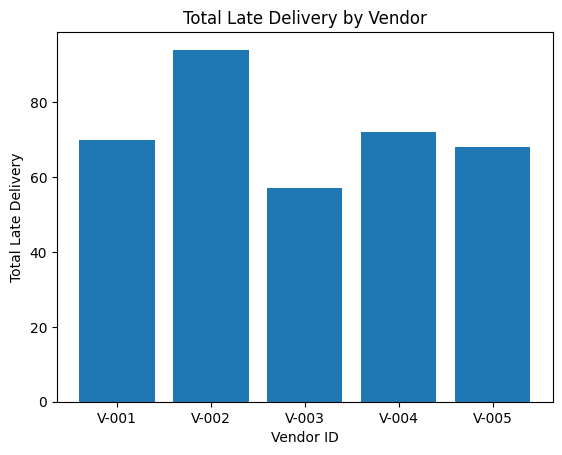

In [9]:
#Late delivery
df['Delivery_staus'] = np.where(df['Delivery_Date'] > df['Expected_Delivery_Date'], 'Late', 'On_Time')
df['Delivery_staus']

#count late delivery by vendor
total_late_delivery = df[df['Delivery_staus'] == 'Late'].groupby('Vendor_ID')['Delivery_staus'].count()
total_late_delivery

#plot bar
plt.bar(total_late_delivery.index,total_late_delivery.values)
plt.xlabel('Vendor ID')
plt.ylabel('Total Late Delivery')
plt.title('Total Late Delivery by Vendor')
plt.show()



In [10]:
# Calculate IQR
iqr_value = iqr(total_late_delivery)

# Calculate IQR points
q1 = total_late_delivery.quantile(0.25)
q3 = total_late_delivery.quantile(0.75)
lower_bound = q1 - 1.5 * iqr_value
upper_bound = q3 + 1.5 * iqr_value

# Print IQR points
print("IQR:", iqr_value)
print("Lower Bound (Q1 - 1.5 * IQR):", lower_bound)
print("Upper Bound (Q3 + 1.5 * IQR):", upper_bound)

# Identify vendors outside IQR points
outliers = total_late_delivery[(total_late_delivery < lower_bound) | (total_late_delivery > upper_bound)]
print("\nVendors outside IQR points:")
print(outliers)



IQR: 4.0
Lower Bound (Q1 - 1.5 * IQR): 62.0
Upper Bound (Q3 + 1.5 * IQR): 78.0

Vendors outside IQR points:
Vendor_ID
V-002    94
V-003    57
Name: Delivery_staus, dtype: int64


In [12]:
total_delivery = df.groupby('Vendor_ID')['Delivery_staus'].count()
total_delivery

,Delivery_staus
Vendor_ID,
V-001,101
V-002,126
V-003,82
V-004,96
V-005,95


In [15]:
Percentage_of_late_delivery = (total_late_delivery / total_delivery) * 100
Percentage_of_late_delivery

,Delivery_staus
Vendor_ID,
V-001,69.306931
V-002,74.603175
V-003,69.512195
V-004,75.000000
V-005,71.578947


In [23]:

# Assuming 'df' is your DataFrame containing the vendor performance data

# Convert date columns to datetime objects
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])

# Calculate delivery time in days
df['Delivery_Time'] = (df['Delivery_Date'] - df['Order_Date']).dt.days

delivery_time_variability = df.groupby('Vendor_ID')['Delivery_Time'].std()